In [1]:
import pyphase
from pyphase import *
import numpy as np

In [2]:
#%% Choose image display to use
displayer = utilities.PyplotImageDisplayer()

In [3]:
#%% Load dataset
data = dataset.NanomaxPreprocessed2D('star', version='test')

In [4]:
#%% Align images using default registrator
# Increase number of resolutions and 
pyphase.registrator.parameters.NumberOfResolutions = 8
pyphase.registrator.parameters.MaximumNumberOfIterations = 3000

data.align_projection()

Aligning position 1
Found elastix version: 4.900 in '/home/ext-maxlan/elastix/bin/elastix'
Aligning position 2
Aligning position 3
Aligning position 4


In [5]:
#%% Phase retrieval from a dataset using CTF
retriever = phaseretrieval.CTF(data)

# Modify regularisation parameter
retriever.alpha = [1e-3, 1e-8] # [LF, HF]

In [6]:
#%% Reconstruct
phase, attenuation = retriever.reconstruct_projection(dataset=data, projection=0) 

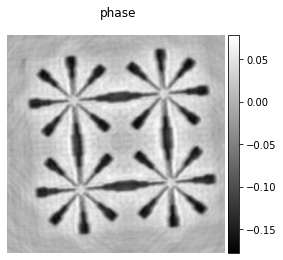

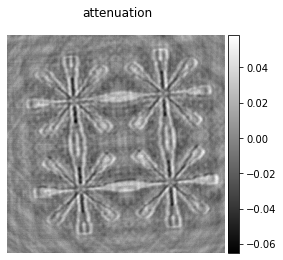

In [13]:
#%% Display reconstruction
displayer.close_all()
displayer.display(data.get_image(projection=0), title='phase')
displayer.display(data.get_image(projection=0, image_type='attenuation'), title='attenuation')

In [8]:
#%% Phase retrieval from images
# Acquisition parameters
energy=13 #keV
effective_distance=np.array([0.010054, 0.0155, 0.0178, 0.019, 0.0203])
pixel_size = np.array([0.005924, 0.006043])*1e-6

nyp = nxp = 4096
ny = nx = 2048

In [9]:
#%% Load images
ID = np.zeros((len(effective_distance), nyp, nxp))
for N in range(len(effective_distance)):
    ID[N] = data.get_projection(projection=0, position=N, pad=True)

In [10]:
#%% Phase retrieval from images using HIO_ER
retriever = phaseretrieval.HIO_ER(shape=ID[0].shape, pixel_size=[pixel_size[0], pixel_size[1]], distance=effective_distance, energy=energy, pad=1)

# Modify some parameters
retriever.alpha = [1e-3, 1e-8] # Regularisation parameter used for initialisation
retriever.iterations_hio = 2 # Number of HIO iterations
retriever.iterations_er = 2 # Number of ER iterations
retriever.iterations = 2 # Change number of global iterations

In [11]:
#%% Reconstruct
phase, attenuation = retriever.reconstruct_image(ID)

========== processing distance 1 ==========
Iteration 0001, error: 1.1e-05
Iteration 0002, error: 7.9e-06
Iteration 0003, error: 6.3e-06
Iteration 0004, error: 5.3e-06
Iteration 0005, error: 4.7e-06
Iteration 0006, error: 4.2e-06
Iteration 0007, error: 3.8e-06
Iteration 0008, error: 3.5e-06
========== processing distance 2 ==========
Iteration 0001, error: 8.4e-05
Iteration 0002, error: 7e-05
Iteration 0003, error: 6.4e-05
Iteration 0004, error: 6e-05
Iteration 0005, error: 5.7e-05
Iteration 0006, error: 5.4e-05
Iteration 0007, error: 5.2e-05
Iteration 0008, error: 5.1e-05
========== processing distance 3 ==========
Iteration 0001, error: 1.7e-05
Iteration 0002, error: 9.8e-06
Iteration 0003, error: 7e-06
Iteration 0004, error: 5.1e-06
Iteration 0005, error: 4e-06
Iteration 0006, error: 3.3e-06
Iteration 0007, error: 2.8e-06
Iteration 0008, error: 2.4e-06
========== processing distance 4 ==========
Iteration 0001, error: 2.8e-05
Iteration 0002, error: 1.9e-05
Iteration 0003, error: 1.5

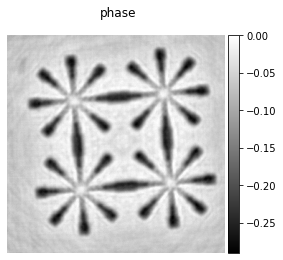

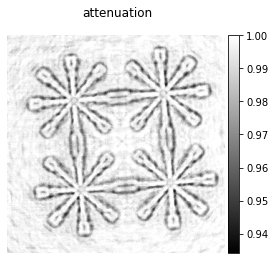

In [12]:
#%% Display reconstruction
displayer.close_all()
displayer.display(utilities.resize(phase, [ny, nx]), 'phase')
displayer.display(utilities.resize(attenuation, [ny, nx]), 'attenuation')